In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


class Image():
    def __init__(self):
        print('Initialized successfully!\n')

    def Getpath(self, path):
        """
        """
        path_list = []  
        for root, dirs, files in os.walk(path):  
            for file in files:  
                if file.lower().endswith('.jpg'):  
                    path_list.append(os.path.join(root, file))  
        return path_list

    def read(self, path, bins = 256):
        self.path = path
        self.bins = bins
        self.img = cv2.imread(path, 0)
        self.undo_img = self.img
        if self.img.all() != None:
            print('Read succeeded!\n')

    def Histogram(self):
        self.mat_hist, bins = np.histogram(self.img.ravel(), self.bins, [0,self.bins])
        hist = plt.hist(self.img.ravel(), bins = self.bins)

    def GetCDF(self):
        area = multiply(self.img)
        self.mat_hist, bins = np.histogram(self.img.ravel(), self.bins, [0,self.bins])

        cdf = [0] * self.bins
        for s in range(self.bins):
            cdf[s] = np.sum(self.mat_hist[:s+1]) / area
        return cdf

    def Equalization(self):
        cdf = self.GetCDF()
        cdf_norm = cdf
        for i in range(self.bins):
            cdf_norm[i] = cdf[i] * max(self.mat_hist)

        equ = cv2.equalizeHist(self.img)
        self.res = np.hstack((self.img, equ))

        plt.plot(cdf_norm, color = 'b')
        plt.hist(self.res.flatten(), 256, [0, 256], color = 'r')
        plt.xlim([0,256])
        plt.legend(('CDF','Equalized histogram'), loc = 'upper left')
        plt.show()

        cv2.imshow('img',self.res)
        cv2.waitKey()
        cv2.destroyAllWindows()


    def filt(self, img, model = 'gaussian', d = 3, sigma=2, t1 = 100, t2 = 200, dx = 0, dy = 0):
        if model == 'gaussian':
            flt = cv2.GaussianBlur(img, (d, d), sigmaX=sigma, sigmaY=sigma)
        elif model == 'laplacian':
            flt = cv2.Laplacian(img, cv2.CV_64F)
            flt = cv2.convertScaleAbs(flt)
        elif model == 'canny':
            flt = cv2.Canny(img, threshold1 = t1, threshold2 = t2)
        elif model == 'average':
            flt = cv2.blur(img, (d, d))
        elif model =='median':
            flt = cv2.medianBlur(img, d)
        elif model == 'sobel':
            if dx * dy :
                flt = cv2.Sobel(img, cv2.CV_64F, dx, dy, ksize=d)
            else:
                print('Error! No parameters given to dx or dy! Set dx = dy = 1 defaultly!')
                sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
                sobelx = cv2.convertScaleAbs(sobelx)

                sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)
                sobely = cv2.convertScaleAbs(sobely)
                flt = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
        elif model == 'fourier':
            dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
            dft_shift = np.fft.fftshift(dft)
            flt = np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
        return flt
    
    def edgeExtract(self, img, threshold1 = 100, threshold2 = 200):
        edges = cv2.Canny(img, threshold1, threshold2)
        return edges
    
    def show(self, img):
        cv2.imshow('Image(Grey-Scaled)', img)
        cv2.waitKey()
        cv2.destroyAllWindows()

    def save(self, path):
        cv2.imwrite(path, self.img)
    
    def undo(self):
        return self.undo_img

def multiply(tuple):
    factor = 1
    shape = tuple.shape
    for elem in shape:
        factor *= elem
    return factor


def show(img):
    cv2.imshow('Image(Processed)', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def imshow(img):
    plt.imshow(img)

def Getpath(path):
    """
    """
    path_list = []  
    for root, dirs, files in os.walk(path):  
        for file in files:  
            if file.lower().endswith('.jpg'):  
                path_list.append(os.path.join(root, file))  
    return path_list

"""
极致的去噪 + 极小的Canny参数 = 最好的边缘
"""

'\n极致的去噪 + 极小的Canny参数 = 最好的边缘\n'

In [ ]:
lists = Getpath('data')
a = [Image() for i in range(6)]
for i in range(6):
    a[i].read(lists[i])

Initialized successfully!

Initialized successfully!

Initialized successfully!

Initialized successfully!

Initialized successfully!

Initialized successfully!

Read succeeded!

Read succeeded!

Read succeeded!

Read succeeded!

Read succeeded!

Read succeeded!



In [ ]:
cdf = []
for i in range(6):
    cdf.append(a[i].GetCDF())

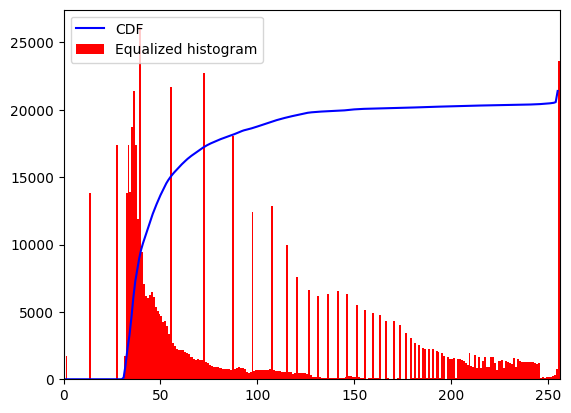

In [ ]:
a[0].Equalization()

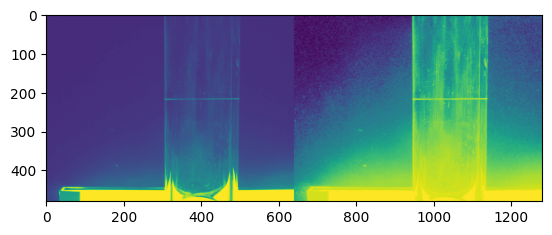

In [ ]:
imshow(a[0].res)

In [ ]:
gaus = a[0].filt(a[0].res, 'gaussian', d = 3, sigma = 2)
lap = a[0].filt(a[0].res, 'laplacian')
canny = a[0].filt(a[0].res, 'canny', t1 = 100, t2 = 200)
average = a[0].filt(a[0].res, 'average', d = 3)
median = a[0].filt(a[0].res, 'median', d = 5)
sobel = a[0].filt(a[0].res, 'sobel', d = 3, dx = 1, dy = 1)
fourier = a[0].filt(a[0].res, 'fourier')

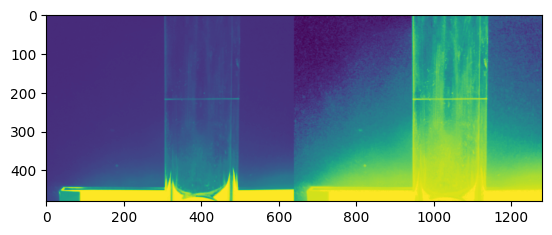

In [ ]:
imshow(gaus)

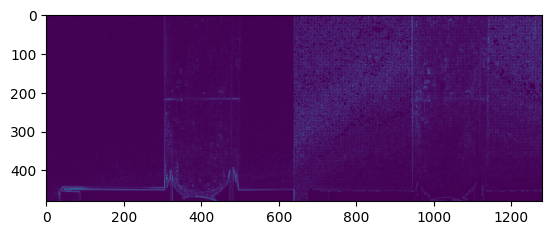

In [ ]:
imshow(lap)

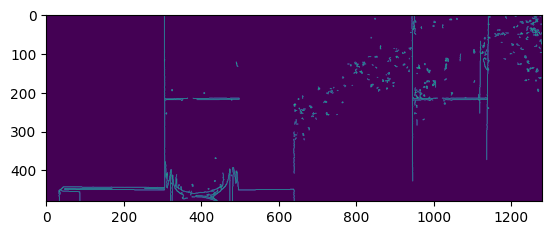

In [ ]:
imshow(canny)

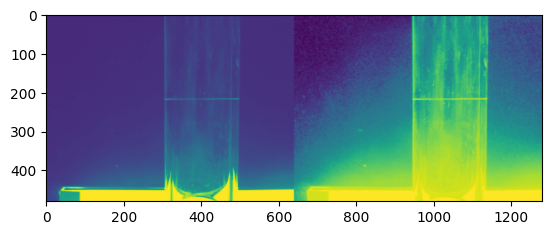

In [ ]:
imshow(average)

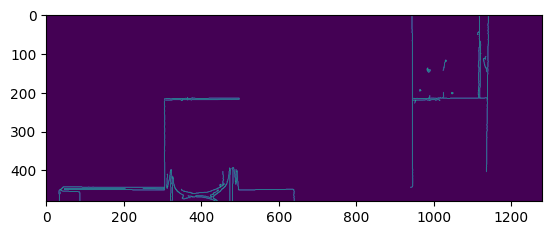

In [ ]:
edge = a[0].edgeExtract(gaus, 50, 200)
imshow(edge)

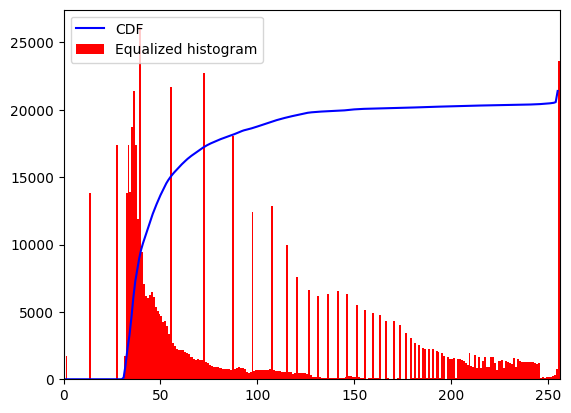

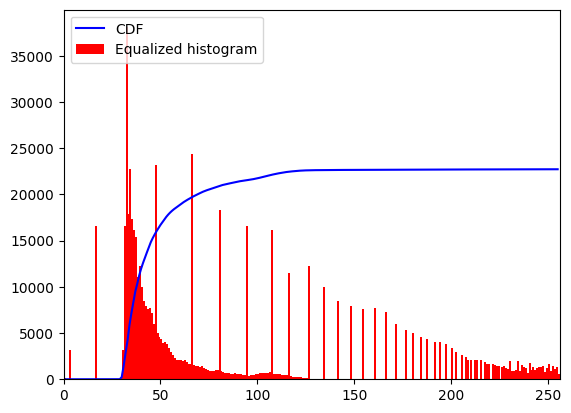

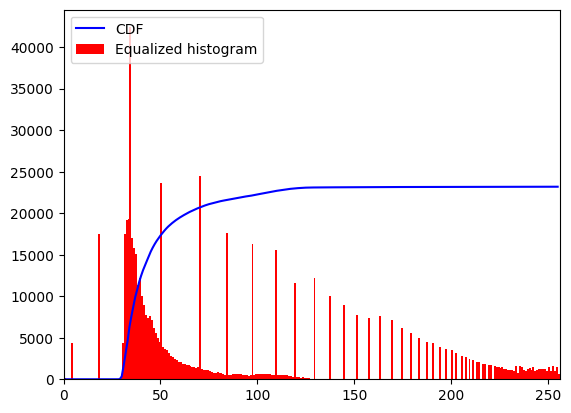

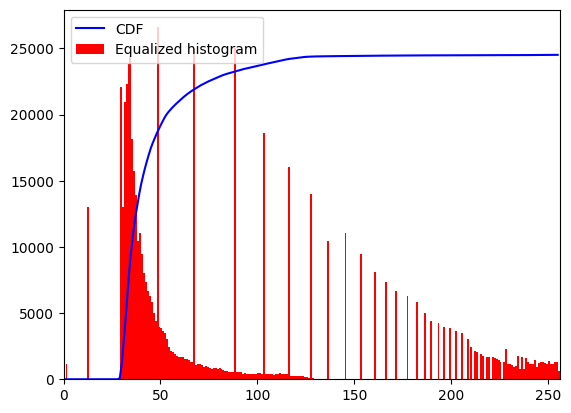

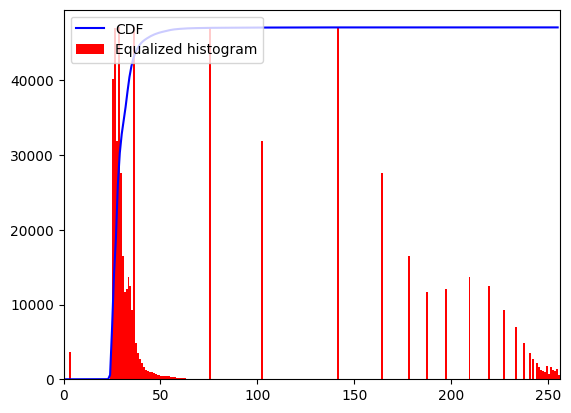

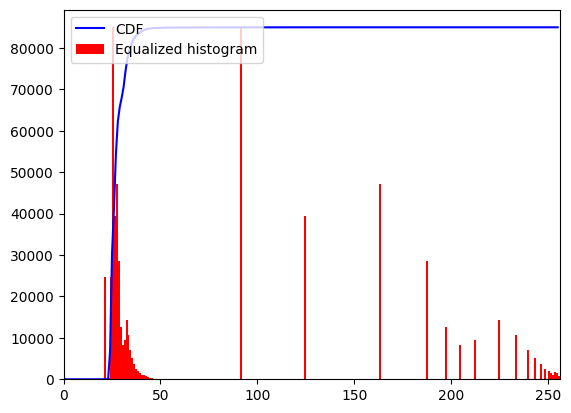

In [ ]:
for i in range(6):
    a[i].Equalization()

In [ ]:
filted, edges = [], []
for i in range(6):
    filted.append(a[i].filt(a[i].img, 'gaussian', d = 5, sigma = 2.5))
    edges.append(a[i].edgeExtract(filted[i], 10, 50))

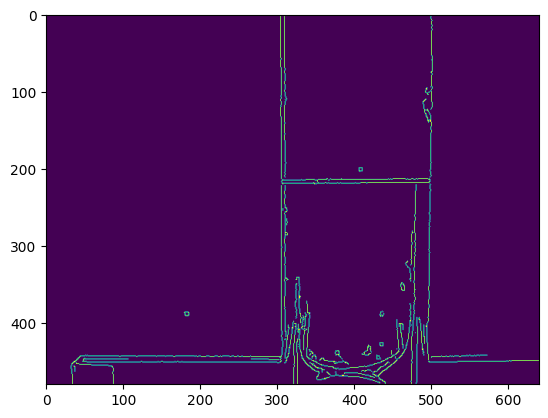

In [ ]:
imshow(edges[0])

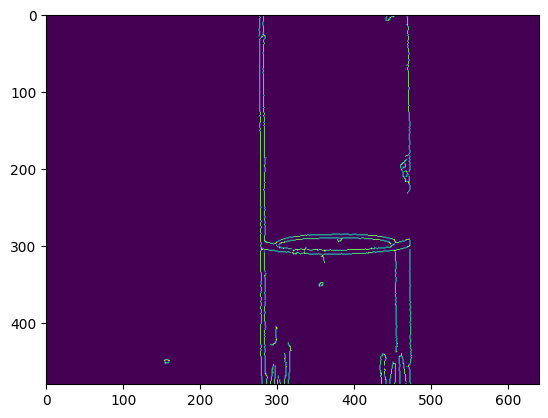

In [ ]:
imshow(edges[1])

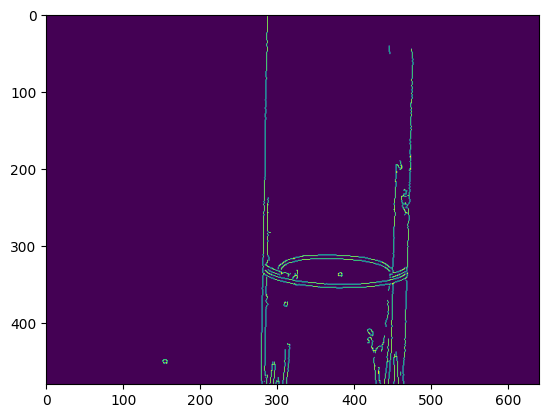

In [ ]:
imshow(edges[2])

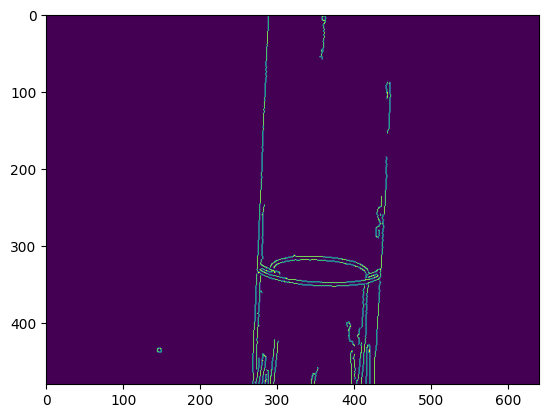

In [ ]:
imshow(edges[3])

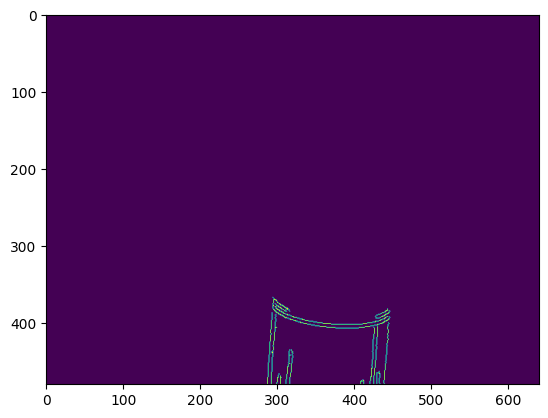

In [ ]:
imshow(edges[4])

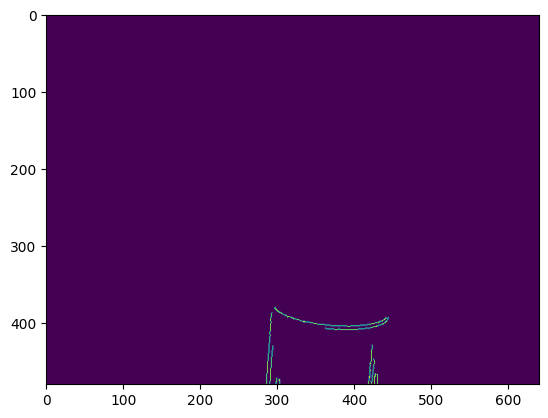

In [ ]:
imshow(edges[5])

In [ ]:
fourier = filt(a[0].img, 'fourier')

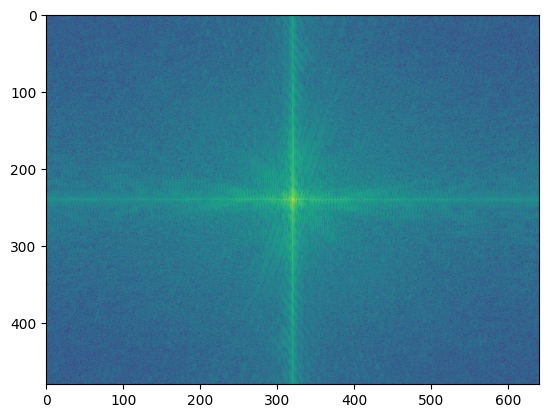

In [ ]:
imshow(fourier)

In [ ]:
for i in range(6):
    a[i].img = edges[i]
    a[i].save(f'提取的边缘/{i}.jpg')